In [151]:
import pandas as pd
from collections import Counter

In [153]:
df_movies = pd.read_csv('movies.csv')
#df_ratings = pd.read_csv('ratings.csv')
#df_ratings.head()

In [155]:
#movie_rating= pd.merge(df_movies,df_ratings,on='movieId')
#movie_rating.head()

In [157]:
#col_drop=['userId','rating','timestamp']
#movie_rating.drop(col_drop,axis=1,inplace=True)
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [180]:
df_movies['genres']=df_movies.genres.apply(lambda x: x.replace('|',','))

In [182]:
genre_list= df_movies['genres'].to_list()
genre_list=''.join(genre_list).split(',')

In [184]:
genre_dict= dict (Counter(genre_list))

In [186]:
genre_dict

{'Adventure': 579,
 'Animation': 287,
 'Children': 388,
 'Comedy': 603,
 'FantasyAdventure': 31,
 'FantasyComedy': 52,
 'RomanceComedy': 257,
 'Drama': 1213,
 'RomanceComedyAction': 20,
 'Crime': 464,
 'ThrillerComedy': 332,
 'RomanceAdventure': 89,
 'ChildrenActionAction': 1,
 'HorrorAdventure': 18,
 'ChildrenDramaAction': 3,
 'RomanceCrime': 78,
 'DramaDrama': 120,
 'RomanceComedyComedyAction': 4,
 'ThrillerCrime': 102,
 'Horror': 334,
 'Mystery': 371,
 'ThrillerAction': 322,
 'ThrillerDrama': 216,
 'Sci-FiDrama': 57,
 'RomanceDramaChildren': 2,
 'Fantasy': 389,
 'Sci-FiCrime': 23,
 'DramaDramaMystery': 3,
 'Sci-Fi': 333,
 'ThrillerChildren': 30,
 'DramaCrime': 47,
 'DramaChildren': 29,
 'ComedyComedy': 71,
 'RomanceDramaDrama': 19,
 'WarAction': 56,
 'DramaDramaAction': 18,
 'RomanceMystery': 8,
 'ThrillerAnimation': 34,
 'Musical': 114,
 'RomanceDrama': 156,
 'ComedyDramaDramaComedy': 2,
 'FantasyDrama': 52,
 'ThrillerDramaComedy': 39,
 'CrimeComedy': 35,
 'ThrillerActionComedy': 2

<Axes: >

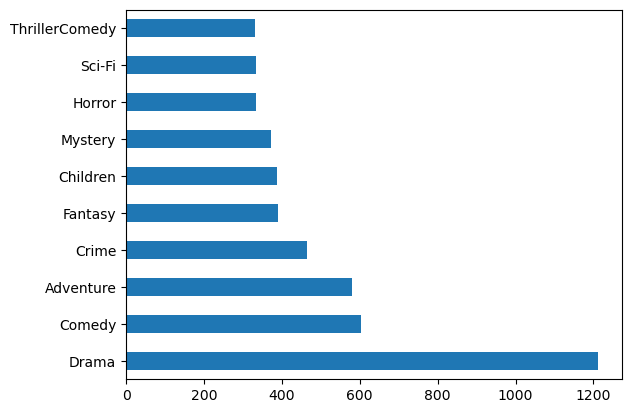

In [190]:
pd.Series(genre_dict).sort_values(ascending=False).head(10).plot(kind='barh')

modelling

In [199]:
modelling_df=df_movies.copy()
modelling_df.drop(['title','movieId'],axis=1,inplace=True)
modelling_df.head()

,genres
0,"Adventure,Animation,Children,Comedy,Fantasy"
1,"Adventure,Children,Fantasy"
2,"Comedy,Romance"
3,"Comedy,Drama,Romance"
4,Comedy


to matrix vectorisation

In [206]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [218]:
vectorizer=CountVectorizer()
vector_count=vectorizer.fit_transform(modelling_df['genres'])

In [220]:
vectorizer.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

In [222]:
vector_count.todense()

matrix([[0, 1, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [230]:
movie_genres_df =pd.DataFrame(vector_count.todense(), columns=vectorizer.get_feature_names_out())

In [232]:
movie_genres_df.head()

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,...,listed,musical,mystery,no,noir,romance,sci,thriller,war,western
0,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
from sklearn.neighbors import NearestNeighbors
nn_algo = NearestNeighbors(metric='cosine')
nn_algo.fit(movie_genres_df)

NearestNeighbors(metric='cosine')

testing

In [239]:
df_movies[df_movies['title'].str.lower().str.contains('batman')]

,movieId,title,genres
126,153,Batman Forever (1995),"Action,Adventure,Comedy,Crime"
509,592,Batman (1989),"Action,Crime,Thriller"
1060,1377,Batman Returns (1992),"Action,Crime"
1174,1562,Batman & Robin (1997),"Action,Adventure,Fantasy,Thriller"
2418,3213,Batman: Mask of the Phantasm (1993),"Animation,Children"
5463,26152,Batman (1966),"Action,Adventure,Comedy"
5620,27155,"Batman/Superman Movie, The (1998)","Action,Adventure,Animation,Children,Fantasy,Sc..."
5631,27311,Batman Beyond: Return of the Joker (2000),"Action,Animation,Crime,Sci-Fi,Thriller"
5917,33794,Batman Begins (2005),"Action,Crime,IMAX"
6815,60979,Batman: Gotham Knight (2008),"Action,Animation,Crime"


In [245]:
watched_movies=movie_genres_df.iloc[5917]

In [247]:
watched_movies

action         1
adventure      0
animation      0
children       0
comedy         0
crime          1
documentary    0
drama          0
fantasy        0
fi             0
film           0
genres         0
horror         0
imax           1
listed         0
musical        0
mystery        0
no             0
noir           0
romance        0
sci            0
thriller       0
war            0
western        0
Name: 5917, dtype: int64

In [253]:
distance,neighbors=nn_algo.kneighbors([watched_movies],n_neighbors=6)

C:\Users\shaha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [255]:
neighbors

array([[5917, 8103, 8387, 7768, 8166, 6710]], dtype=int64)

In [259]:
df_movies.iloc[neighbors.tolist()[0]]

,movieId,title,genres
5917,33794,Batman Begins (2005),"Action,Crime,IMAX"
8103,100498,"Good Day to Die Hard, A (2013)","Action,Crime,Thriller,IMAX"
8387,109850,Need for Speed (2014),"Action,Crime,Drama,IMAX"
7768,91529,"Dark Knight Rises, The (2012)","Action,Adventure,Crime,IMAX"
8166,102716,"Fast & Furious 6 (Fast and the Furious 6, The)...","Action,Crime,Thriller,IMAX"
6710,58559,"Dark Knight, The (2008)","Action,Crime,Drama,IMAX"
